<a href="https://colab.research.google.com/github/RichardKameri/tydata/blob/main/sportsanalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
sports = pd.read_csv('/content/sportswinners.csv')
sports.head()

,edition,start_date,winner_name,winner_team,distance,time_overall,time_margin,stage_wins,stages_led,height,weight,age,born,died,full_name,nickname,birth_town,birth_country,nationality
0,1,1903-07-01,Maurice Garin,La Française,2428.0,94.553889,2.989167,3,6,1.62,60.0,32,1871-03-03,1957-02-19,NaN,The Little Chimney-sweep,Arvier,Italy,France
1,2,1904-07-02,Henri Cornet,Conte,2428.0,96.098611,2.270556,1,3,NaN,NaN,19,1884-08-04,1941-03-18,NaN,Le rigolo (The joker),Desvres,France,France
2,3,1905-07-09,Louis Trousselier,Peugeot–Wolber,2994.0,NaN,NaN,5,10,NaN,NaN,24,1881-06-29,1939-04-24,NaN,Levaloy / Trou-trou,Paris,France,France
3,4,1906-07-04,René Pottier,Peugeot–Wolber,4637.0,NaN,NaN,5,12,NaN,NaN,27,1879-06-05,1907-01-25,NaN,NaN,Moret-sur-Loing,France,France
4,5,1907-07-08,Lucien Petit-Breton,Peugeot–Wolber,4488.0,NaN,NaN,2,5,NaN,NaN,24,1882-10-18,1917-12-20,Lucien Georges Mazan,Lucien Petit-Breton,Plessé,France,France


In [3]:
sports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   edition        106 non-null    int64  
 1   start_date     106 non-null    object 
 2   winner_name    106 non-null    object 
 3   winner_team    106 non-null    object 
 4   distance       106 non-null    float64
 5   time_overall   98 non-null     float64
 6   time_margin    98 non-null     float64
 7   stage_wins     106 non-null    int64  
 8   stages_led     106 non-null    int64  
 9   height         66 non-null     float64
 10  weight         67 non-null     float64
 11  age            106 non-null    int64  
 12  born           106 non-null    object 
 13  died           56 non-null     object 
 14  full_name      46 non-null     object 
 15  nickname       74 non-null     object 
 16  birth_town     106 non-null    object 
 17  birth_country  106 non-null    object 
 18  nationalit

In [4]:
sports.nunique()

,0
edition,106
start_date,106
winner_name,63
winner_team,48
distance,102
time_overall,98
time_margin,42
stage_wins,9
stages_led,22
height,19


In [5]:
sports.columns

Index(['edition', 'start_date', 'winner_name', 'winner_team', 'distance',
       'time_overall', 'time_margin', 'stage_wins', 'stages_led', 'height',
       'weight', 'age', 'born', 'died', 'full_name', 'nickname', 'birth_town',
       'birth_country', 'nationality'],
      dtype='object')

In [6]:
# checking for missing values
sports.isnull().sum()

,0
edition,0
start_date,0
winner_name,0
winner_team,0
distance,0
time_overall,8
time_margin,8
stage_wins,0
stages_led,0
height,40


<Axes: >

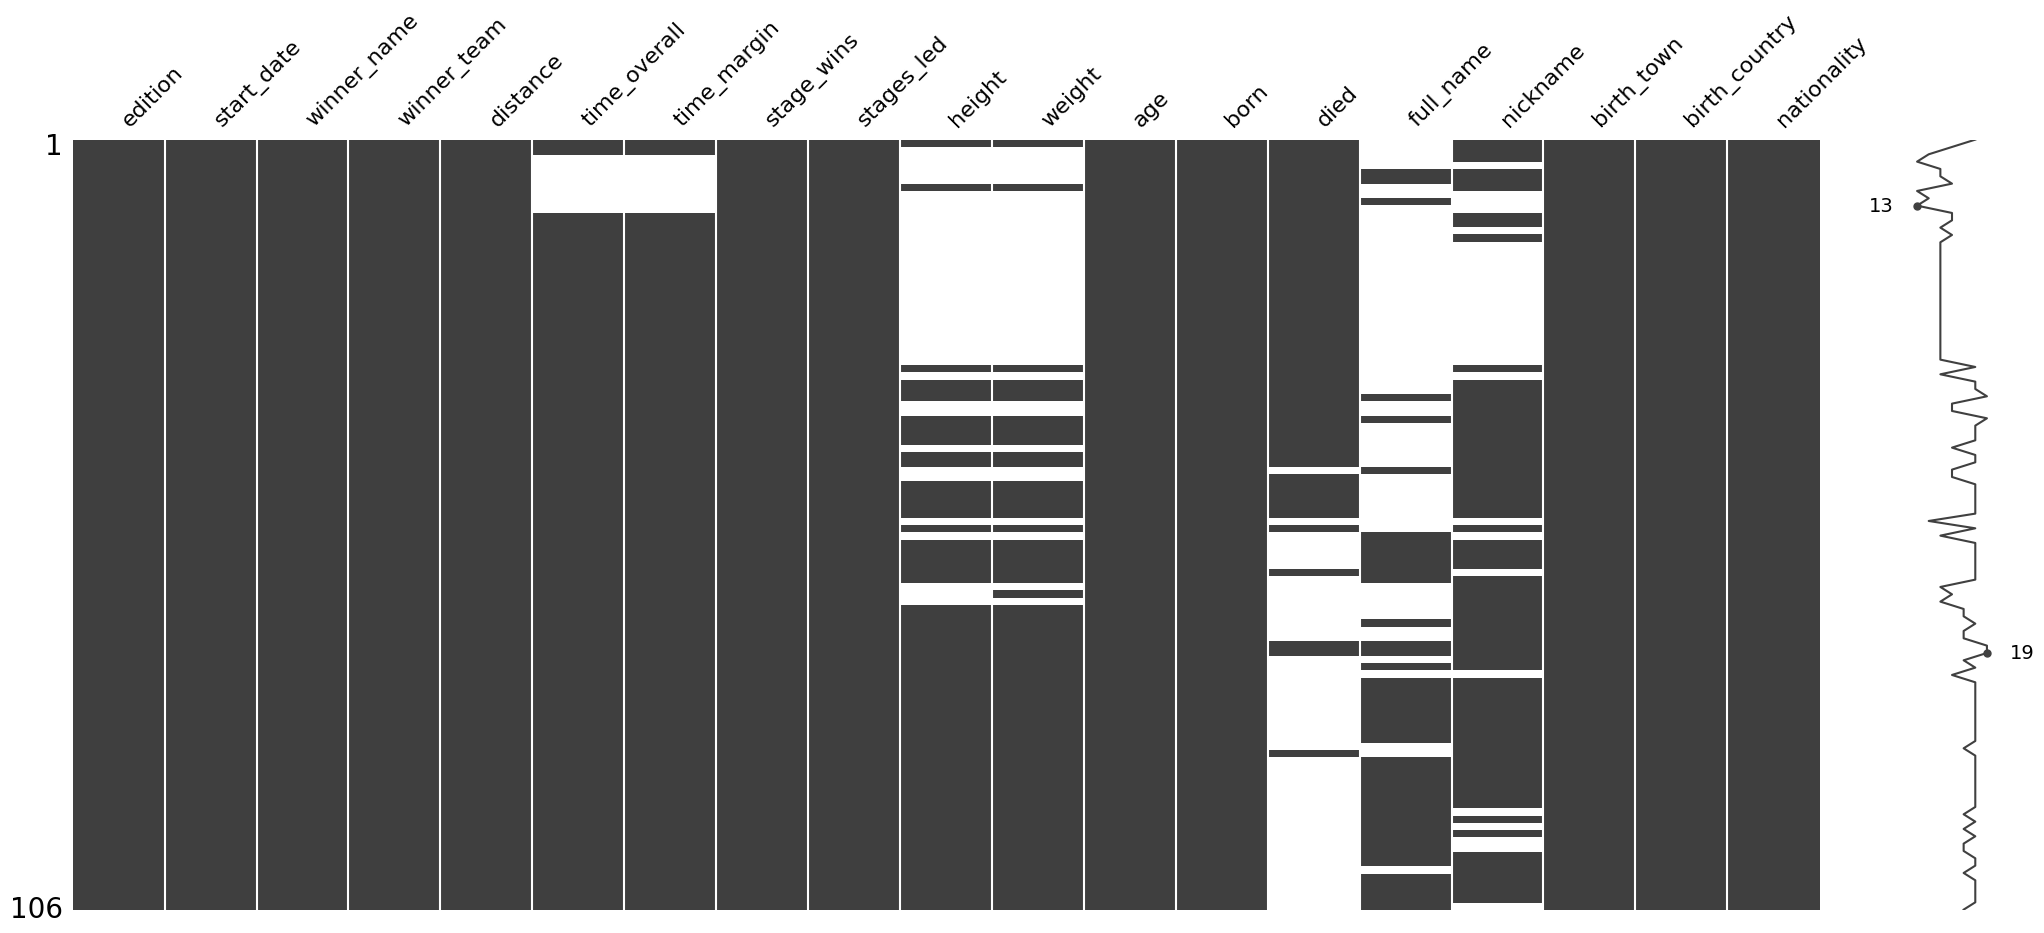

In [8]:
# dealing with missing values
import missingno as ms
ms.matrix(sports)

<Axes: >

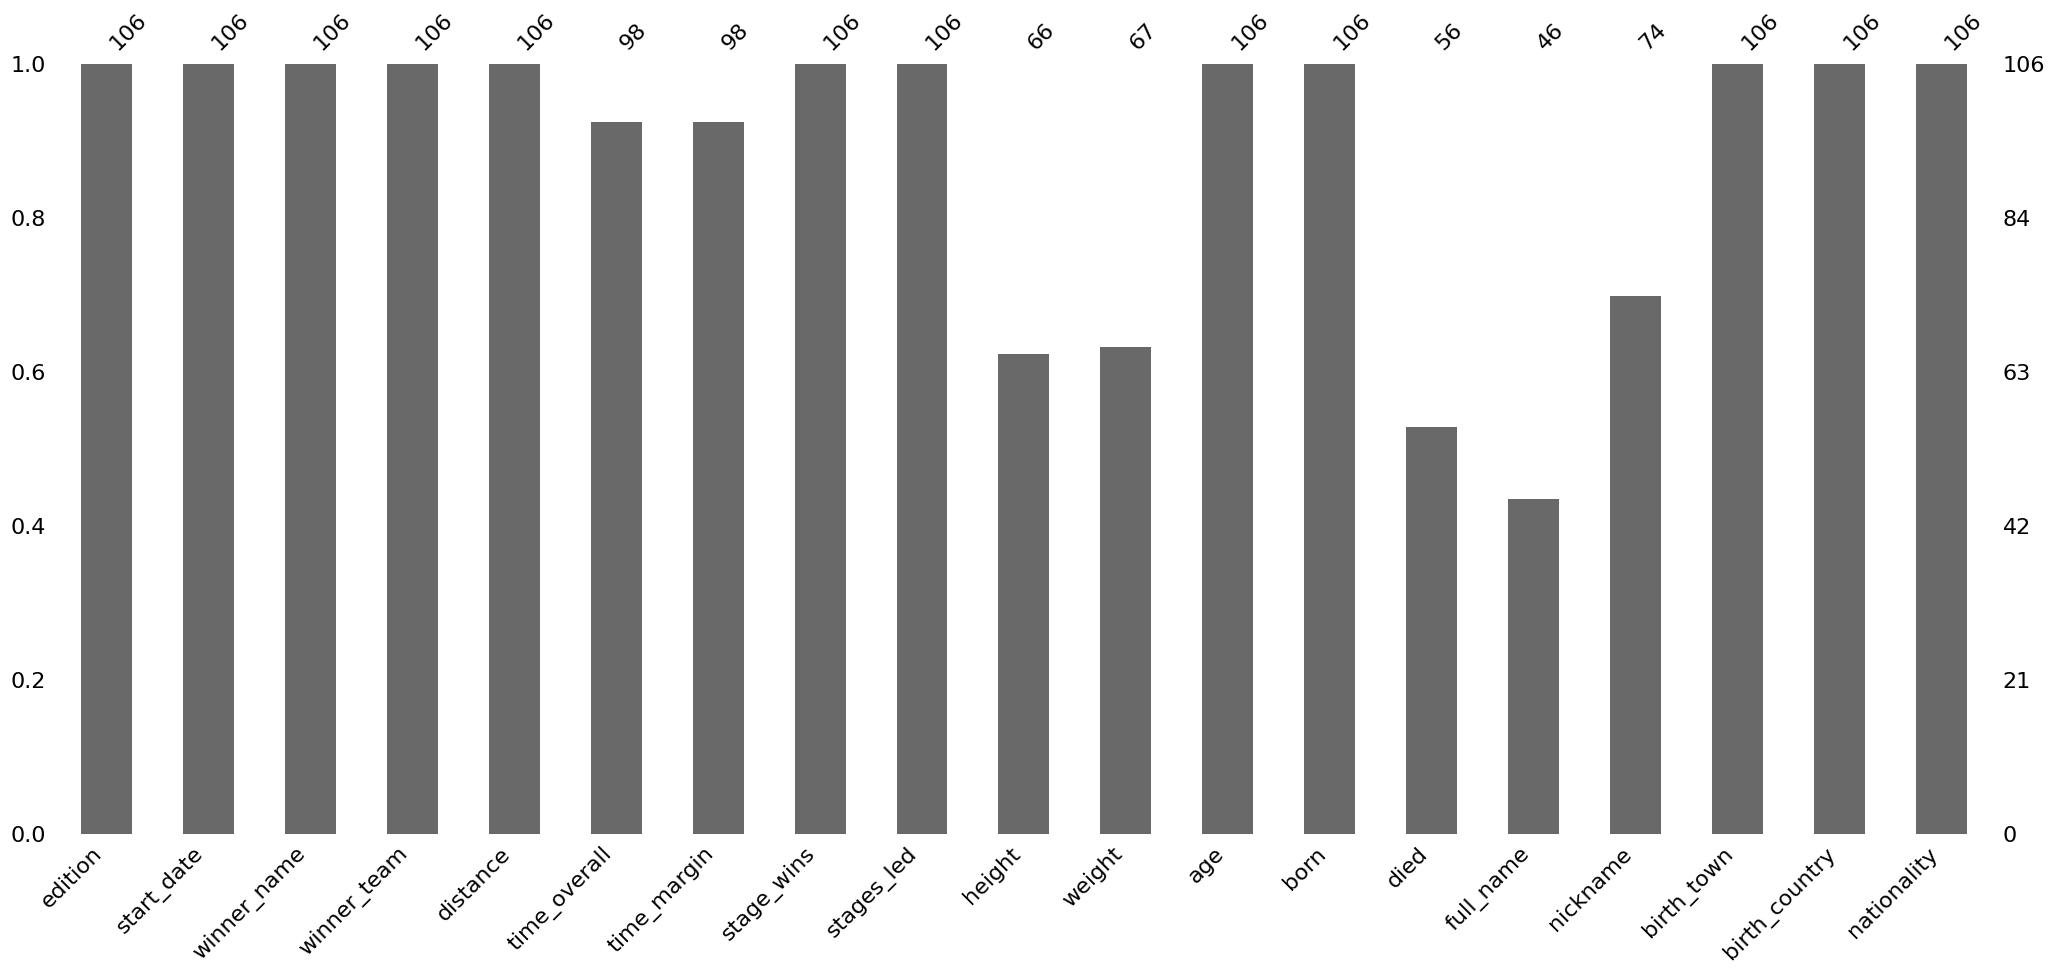

In [10]:
# Barplot
ms.bar(sports)

In [11]:
# percentage of missing values
sports.isnull().sum()/len(sports)*100

,0
edition,0.000000
start_date,0.000000
winner_name,0.000000
winner_team,0.000000
distance,0.000000
time_overall,7.547170
time_margin,7.547170
stage_wins,0.000000
stages_led,0.000000
height,37.735849


In [12]:
# drop full_name,died,height,weight
sports.drop(['full_name','died','height','weight'],axis=1,inplace=True)

In [13]:
# fill missing values with mean
sports['age'].fillna(sports['age'].mean(),inplace=True)


<ipython-input-13-b11c7fb38127>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sports['age'].fillna(sports['age'].mean(),inplace=True)


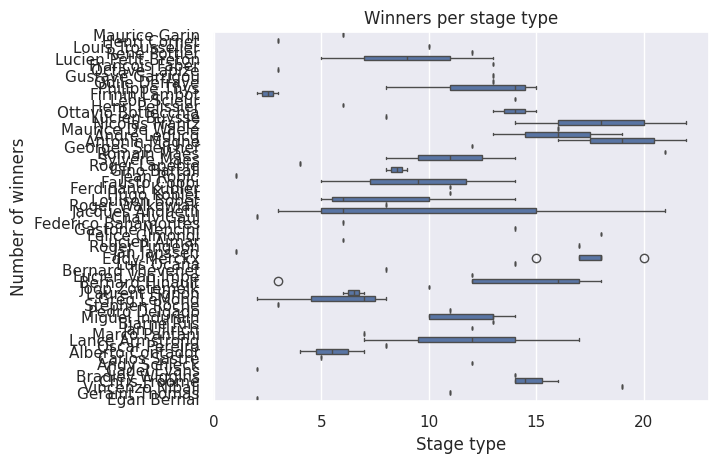

In [33]:
# box plot of the winners per stage type and set the titles and the lables
sns.boxplot(x='stages_led',y='winner_name',data=sports)
plt.title('Winners per stage type')
plt.xlabel('Stage type')
plt.ylabel('Number of winners')
plt.show()


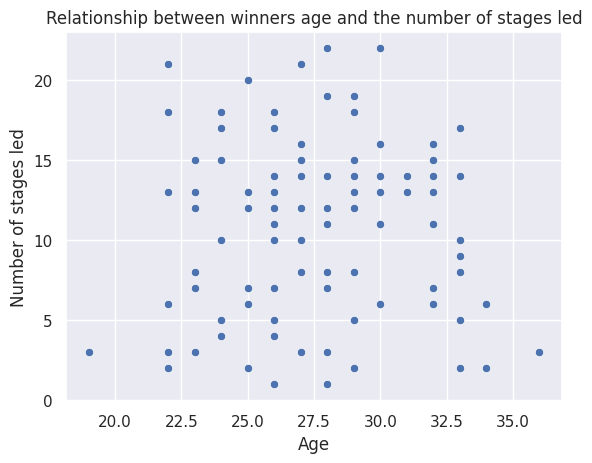

In [28]:
# relationship between winners age and and the number of stages led
sns.set_theme(style='darkgrid')
sns.scatterplot(x='age',y='stages_led',data=sports)
plt.title('Relationship between winners age and the number of stages led')
plt.xlabel('Age')
plt.ylabel('Number of stages led')
plt.show()

In [35]:
# Sort by the most recent winning and find the winner's nationality and display the top
sports.sort_values(by='edition',ascending=False,inplace=True)
sports.head(1)

,edition,start_date,winner_name,winner_team,distance,time_overall,time_margin,stage_wins,stages_led,age,born,nickname,birth_town,birth_country,nationality
105,106,2019-07-06,Egan Bernal,Team Ineos,3349.0,82.95,0.016944,0,2,22,1997-01-13,NaN,Bogotá,Columbia,Colombia
